In [257]:
! pip install chembl_webresource_client

In [258]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [259]:
target = new_client.target
target_query = target.search('Alzheimers')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Nucleosome-remodeling factor subunit BPTF,6.0,False,CHEMBL3085621,"[{'accession': 'Q12830', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Nicastrin,5.0,False,CHEMBL3418,"[{'accession': 'Q92542', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Gamma-secretase,5.0,False,CHEMBL2094135,"[{'accession': 'Q96BI3', 'component_descriptio...",PROTEIN COMPLEX,9606
3,[],Rattus norvegicus,Amyloid-beta A4 protein,4.0,False,CHEMBL3638365,"[{'accession': 'P08592', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Mus musculus,Amyloid-beta A4 protein,4.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090
5,[],Homo sapiens,Amyloid-beta A4 protein,3.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606


In [260]:
selected_target = targets.target_chembl_id[5]
selected_target

'CHEMBL2487'

In [261]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,None,None,25720807,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1716,None,None,25720808,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1717,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720809,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1718,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720810,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,26.6


In [262]:
df.to_csv('bioactivity_data_raw.csv', index=False)
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,None,None,25720807,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1716,None,None,25720808,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1717,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720809,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1718,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720810,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,26.6


In [263]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [264]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0
...,...,...,...
1715,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,50000.0
1716,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,50000.0
1717,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,50000.0
1718,CHEMBL5411138,COC1=C(CC(=O)CCc2ccccc2)C(=O)O[C@@H]1O,26600.0


In [265]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4.dropna(inplace=True)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1493,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,inactive
1494,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,inactive
1495,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,inactive
1496,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,inactive


In [266]:
df4.to_csv('bioactivity_data_preprocessed.csv', index=False)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1493,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,inactive
1494,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,inactive
1495,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,inactive
1496,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,inactive


In [267]:
! pip install rdkit

In [268]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [269]:
df = pd.read_csv('/content/bioactivity_data_preprocessed.csv')

In [270]:
df = df[df['canonical_smiles'].notna()]
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1319,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,inactive
1320,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,inactive
1321,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,inactive
1322,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,inactive


In [271]:
def lipinski(smiles, verbose=False):
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)


    baseData = np.arange(1,1)
    i = 0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i == 0):
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i + 1

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors


In [272]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.3188,1.0,2.0
1,299.461,3.2412,1.0,3.0
2,311.422,3.3188,1.0,2.0
3,327.877,3.8331,1.0,2.0
4,372.328,3.9422,1.0,2.0
...,...,...,...,...
1319,489.267,4.1591,2.0,5.0
1320,489.267,4.1591,2.0,5.0
1321,449.408,3.5767,2.0,6.0
1322,449.408,3.5767,2.0,6.0


In [273]:
df_combined = pd.concat([df, df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate,311.422,3.3188,1.0,2.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate,299.461,3.2412,1.0,3.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate,311.422,3.3188,1.0,2.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.8331,1.0,2.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.9422,1.0,2.0
...,...,...,...,...,...,...,...,...
1319,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,inactive,489.267,4.1591,2.0,5.0
1320,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,inactive,489.267,4.1591,2.0,5.0
1321,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,inactive,449.408,3.5767,2.0,6.0
1322,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,inactive,449.408,3.5767,2.0,6.0


In [274]:
def pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
        molar = i * (10**-9)
        if molar > 0:
            pIC50.append(-np.log10(molar))
        else:
            pIC50.append(np.nan)

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
    return x

In [275]:
df_combined.standard_value.describe()

,standard_value
count,1324.000000
mean,20381.818316
std,53110.430220
min,-5.000000
25%,190.000000
50%,4700.000000
75%,17000.000000
max,800000.000000


In [276]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
    input['standard_value_norm'] = norm
    x = input.drop('standard_value',axis=1)

    return x

In [277]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.3188,1.0,2.0,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.2412,1.0,3.0,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.3188,1.0,2.0,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,10000.0
...,...,...,...,...,...,...,...,...
1319,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,inactive,489.267,4.1591,2.0,5.0,22.0
1320,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,inactive,489.267,4.1591,2.0,5.0,22.0
1321,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,inactive,449.408,3.5767,2.0,6.0,3.0
1322,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,inactive,449.408,3.5767,2.0,6.0,3.0


In [278]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,1324.000000
mean,20381.818316
std,53110.430220
min,-5.000000
25%,190.000000
50%,4700.000000
75%,17000.000000
max,800000.000000


In [279]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.3188,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.2412,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.3188,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
1319,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,inactive,489.267,4.1591,2.0,5.0,7.657577
1320,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,inactive,489.267,4.1591,2.0,5.0,7.657577
1321,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,inactive,449.408,3.5767,2.0,6.0,8.522879
1322,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,inactive,449.408,3.5767,2.0,6.0,8.522879


In [280]:
df_final.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.3188,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.2412,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.3188,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000


In [281]:
df_final.pIC50.describe()

,pIC50
count,1322.000000
mean,5.731851
std,1.328100
min,3.096910
25%,4.769551
50%,5.324692
75%,6.699736
max,9.522879


In [282]:
df2_class = df_final[df_final.bioactivity_class != 'intermediate']
df2_class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.6808,1.0,1.0,3.515700
6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.124939
7,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...
1319,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,inactive,489.267,4.1591,2.0,5.0,7.657577
1320,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,inactive,489.267,4.1591,2.0,5.0,7.657577
1321,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,inactive,449.408,3.5767,2.0,6.0,8.522879
1322,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,inactive,449.408,3.5767,2.0,6.0,8.522879


In [283]:
df2_class.to_csv('bioactivity_data_preprocessed_final.csv')

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu


In [285]:
def mannwhitney(descriptor):

    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu

    seed(1)

    selection = [descriptor, 'bioactivity_class']
    df=df2_class[selection]
    active = df[df.bioactivity_class == 'active']
    active = active[descriptor]

    selection = [descriptor, 'bioactivity_class']
    df=df2_class[selection]
    inactive = df[df.bioactivity_class == 'inactive']
    inactive = inactive[descriptor]


    stat, p = mannwhitneyu(active, inactive)


    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({
        'Descriptor': [descriptor],
        'Statistic': [stat],
        'p-value': [p],
        'Interpretation': [interpretation]
    })


    filename = f'mannwhitneyu_{descriptor}.csv'
    results.to_csv(filename, index=False)

    return results

In [286]:
mannwhitney('pIC50')

,Descriptor,Statistic,p-value,Interpretation
0,pIC50,NaN,NaN,Different distribution (reject H0)


In [287]:
mannwhitney('MW')

,Descriptor,Statistic,p-value,Interpretation
0,MW,112939.0,0.054619,Same distribution (fail to reject H0)


In [288]:
mannwhitney('LogP')

,Descriptor,Statistic,p-value,Interpretation
0,LogP,117756.5,0.001801,Different distribution (reject H0)


In [289]:
mannwhitney('NumHDonors')

,Descriptor,Statistic,p-value,Interpretation
0,NumHDonors,78061.0,2.003050e-12,Different distribution (reject H0)


In [290]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistic,p-value,Interpretation
0,NumHAcceptors,93831.5,0.003877,Different distribution (reject H0)


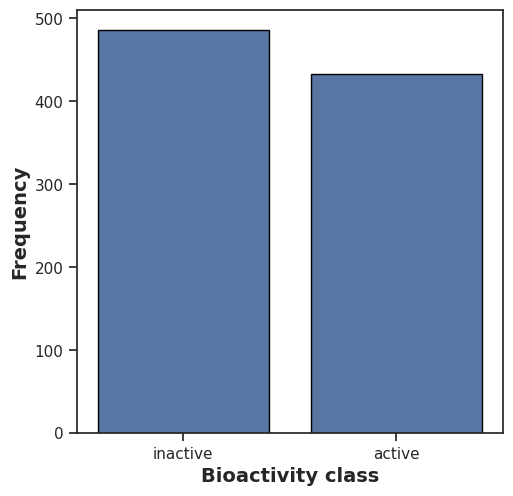

In [291]:
sns.set(style='ticks')
plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='bioactivity_class', data=df2_class, edgecolor='black')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig('plot_bioactivity_class.pdf')
plt.show()

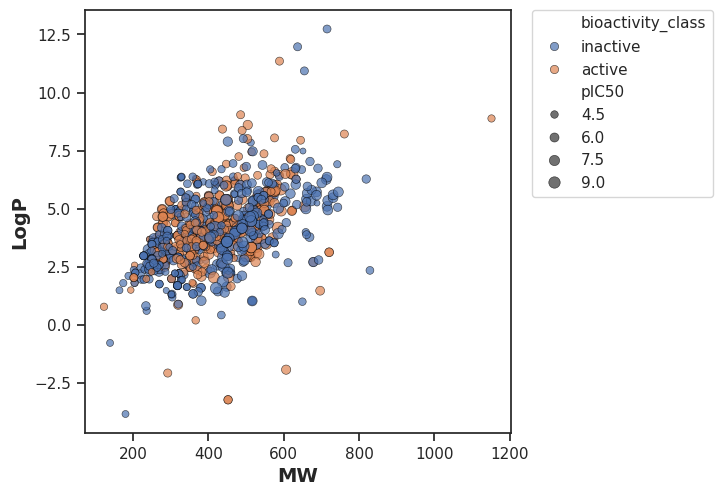

In [292]:
plt.figure(figsize=(5.5, 5.5))
sns.scatterplot(x='MW', y='LogP', data=df2_class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')
plt.show()

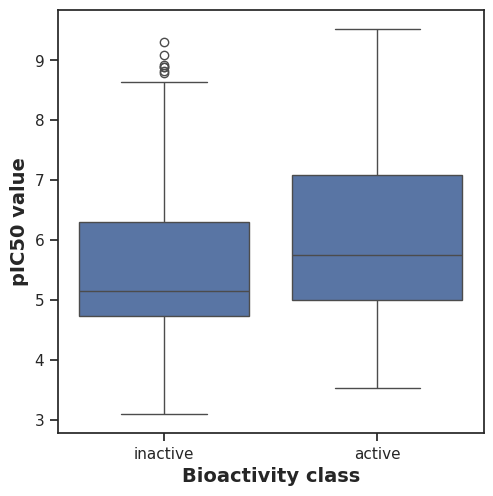

In [293]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='pIC50', data=df2_class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig('plot_ic50.pdf')
plt.show()

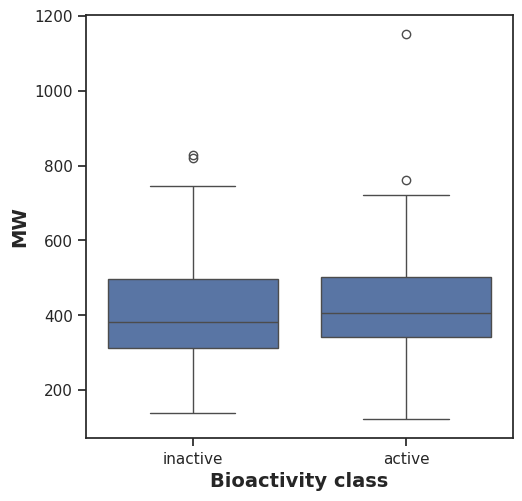

In [294]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='MW', data=df2_class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.savefig('plot_MW.pdf')
plt.show()

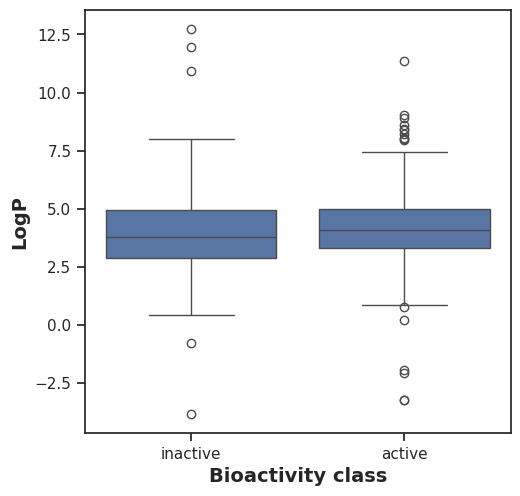

In [295]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='LogP', data=df2_class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.savefig('plot_LogP.pdf')
plt.show()

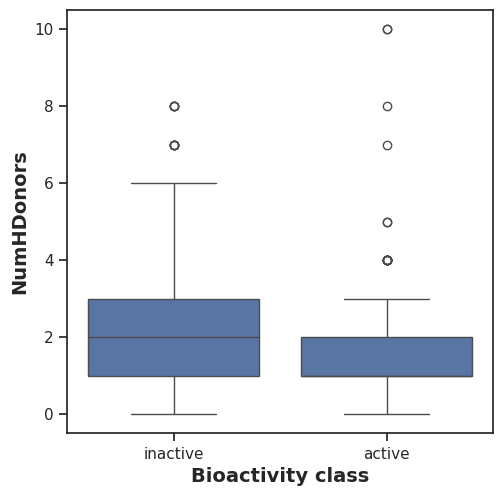

In [296]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='NumHDonors', data=df2_class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.savefig('plot_NumHDonors.pdf')
plt.show()

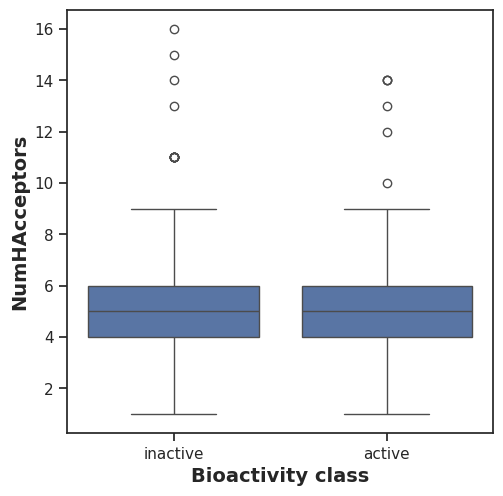

In [297]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data=df2_class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.savefig('plot_NumHAcceptors.pdf')
plt.show()


In [298]:
import pandas as pd

In [299]:
df3 = pd.read_csv('/content/bioactivity_data_preprocessed_final.csv')
df3.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
1,4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
2,5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.6808,1.0,1.0,3.515700
3,6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.124939
4,7,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.113509


In [300]:
!pip install padelpy

In [301]:
!unzip -o padel.zip

Archive:  padel.zip
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inflating: PaDEL-Descriptor/PubchemFingerprinter.xml  
  inflating: __MAC

In [302]:
selection = ['canonical_smiles', 'molecule_chembl_id']
df3_selection = df3[selection]

df3_selection.to_csv('alzheimers_molecule.smi', sep=' ', index=False, header=False)

! cat alzheimers_molecule.smi

CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Cl)cc1 CHEMBL74874
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Br)cc1 CHEMBL75183
CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1 CHEMBL563
CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1 CHEMBL196279
CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1 CHEMBL195970
CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1 CHEMBL195970
CC(C(=O)O)c1ccc(-c2ccc(C3CCCCC3)cc2)c(F)c1 CHEMBL264006
CC(C(=O)O)c1ccc(-c2ccc(C3CCCCC3)cc2)c(F)c1 CHEMBL264006
CC(C(=O)O)c1ccc(-c2ccc(C(F)(F)F)cc2)c(F)c1 CHEMBL193971
CC(C(=O)O)c1ccc(-c2csc3ccccc23)c(F)c1 CHEMBL194274
COc1ccc(-c2ccc(C(C)C(=O)O)cc2F)cc1 CHEMBL196321
CC(C(=O)O)c1ccc(-c2ccc3c(c2)OCO3)c(F)c1 CHEMBL196322
CC(C(=O)O)c1ccc(-c2ccc(OC3CCCCC3)cc2)c(F)c1 CHEMBL380778
CC(C(=O)O)c1ccc(-c2ccc(-c3ccc(O)cc3)cc2)c(F)c1 CHEMBL197202
O=C(O)C1(c2ccc(-c3ccccc3)c(F)c2)CC1 CHEMBL194760
O=C(O)C1(c2ccc(-c3ccc(C(F)(F)F)cc3)c(F)c2)CC1 CHEMBL196246
O=C(O)C1(c2ccc(-c3ccc(C(F)(F)F)cc3)c(F)c2)CC1 CHEMBL196246
O=C(O)C1(c2ccc(-c3ccc(Cl)c(Cl)c3)c(F)c2)CC1 CHEMBL196945
O=C(

In [303]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [304]:
! bash padel.sh

Processing CHEMBL74874 in alzheimers_molecule.smi (1/919). 
Processing CHEMBL75183 in alzheimers_molecule.smi (2/919). 
Processing CHEMBL563 in alzheimers_molecule.smi (3/919). Average speed: 3.53 s/mol.
Processing CHEMBL196279 in alzheimers_molecule.smi (4/919). Average speed: 1.97 s/mol.
Processing CHEMBL195970 in alzheimers_molecule.smi (5/919). Average speed: 1.98 s/mol.
Processing CHEMBL195970 in alzheimers_molecule.smi (6/919). Average speed: 1.53 s/mol.
Processing CHEMBL264006 in alzheimers_molecule.smi (7/919). Average speed: 1.58 s/mol.
Processing CHEMBL264006 in alzheimers_molecule.smi (8/919). Average speed: 1.34 s/mol.
Processing CHEMBL193971 in alzheimers_molecule.smi (9/919). Average speed: 1.42 s/mol.
Processing CHEMBL194274 in alzheimers_molecule.smi (10/919). Average speed: 1.26 s/mol.
Processing CHEMBL196322 in alzheimers_molecule.smi (12/919). Average speed: 1.11 s/mol.
Processing CHEMBL196321 in alzheimers_molecule.smi (11/919). Average speed: 1.23 s/mol.
Processing

In [369]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL75183,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL74874,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL563,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL196279,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL195970,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,CHEMBL3653401,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
915,CHEMBL3653401,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
916,CHEMBL3261067,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
917,CHEMBL3261067,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [370]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
915,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
916,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
917,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [371]:
df3_Y = df3['pIC50']
df3_Y

,pIC50
0,4.958607
1,5.000000
2,3.515700
3,4.124939
4,4.113509
...,...
914,7.657577
915,7.657577
916,8.522879
917,8.522879


In [372]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.515700
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.124939
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.113509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.657577
915,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.657577
916,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.522879
917,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.522879


In [373]:
dataset3.to_csv('alzheimers_bioactivity_data_pIC50_pubchem_fp_AB.csv', index=False)


In [402]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [403]:
df4 = pd.read_csv('/content/alzheimers_bioactivity_data_pIC50_Pubchem_fp_AB.csv')
df4.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.515700
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.124939
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.113509


In [404]:
X = df4.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
915,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
916,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
917,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [405]:
Y = df4["pIC50"]
Y

,pIC50
0,4.958607
1,5.000000
2,3.515700
3,4.124939
4,4.113509
...,...
914,7.657577
915,7.657577
916,8.522879
917,8.522879


In [406]:
Y = Y.fillna(Y.mean())

In [407]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,...,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,1,0,1,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
915,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
916,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
917,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [408]:
X_df = pd.DataFrame(X)
corr_matrix = X_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X1= X_df.drop(columns=to_drop)
X1

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,...,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP818,PubchemFP819
0,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,1,0
1,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,1,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
915,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
916,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
917,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [409]:
from sklearn.feature_selection import SelectKBest, f_regression
X_df = pd.DataFrame(X1)
k = 115
selector = SelectKBest(score_func=f_regression, k=k)
X2= selector.fit_transform(X_df, Y)
X2

array([[1, 1, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [410]:
selected_columns = X1.columns[selector.get_support()]

In [411]:
X2_df = pd.DataFrame(X2, columns=selected_columns)
X2_df.to_csv('descriptor_list.csv', index=False)
X2_df

,PubchemFP2,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP37,PubchemFP143,PubchemFP150,...,PubchemFP714,PubchemFP716,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP777,PubchemFP798,PubchemFP800,PubchemFP818
0,1,1,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,1
1,1,1,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
915,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
916,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
917,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [412]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2, random_state=42)

In [413]:
X_train.shape, Y_train.shape

((735, 115), (735,))

In [414]:
X_test.shape, Y_test.shape

((184, 115), (184,))

In [415]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [416]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svr_model = make_pipeline(StandardScaler(), SVR())
svr_model.fit(X_train, Y_train)
Y_pred_svr = svr_model.predict(X_test)

print("\n🔹 Support Vector Regressor (SVR)")
print("R² score :", r2_score(Y_test, Y_pred_svr))
print("MAE:", mean_absolute_error(Y_test, Y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_svr)))
print("MAPE:", np.mean(np.abs((Y_test - Y_pred_svr) / Y_test)) * 100)


🔹 Support Vector Regressor (SVR)
R² score : 0.7587491934668575
MAE: 0.4974357925097057
RMSE: 0.6791804036425398
MAPE: 8.729236007355606


In [417]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, Y_train)
Y_pred_gb = gb_model.predict(X_test)

print("\n🔹 Gradient Boosting Regressor")
print("R² score :", r2_score(Y_test, Y_pred_gb))
print("MAE:", mean_absolute_error(Y_test, Y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_gb)))
print("MAPE:", np.mean(np.abs((Y_test - Y_pred_gb) / Y_test)) * 100)



🔹 Gradient Boosting Regressor
R² score : 0.7389724038345864
MAE: 0.5305042129393422
RMSE: 0.7064704023294437
MAPE: 9.348972698771346


In [418]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)

print("\n🔹 XGBoost Regressor")
print("R² score :", r2_score(Y_test, Y_pred_xgb))
print("MAE:", mean_absolute_error(Y_test, Y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_xgb)))
print("MAPE:", np.mean(np.abs((Y_test - Y_pred_xgb) / Y_test)) * 100)


🔹 XGBoost Regressor
R² score : 0.7617099291148157
MAE: 0.48586866719210603
RMSE: 0.6749999381077109
MAPE: 8.405097026762824


In [419]:
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor(estimators=[
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
])
voting_model.fit(X_train, Y_train)

Y_pred_vote = voting_model.predict(X_test)

print("\n🔹 Voting Regressor")
print("R² score :", r2_score(Y_test, Y_pred_vote))
print("MAE:", mean_absolute_error(Y_test, Y_pred_vote))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_vote)))
print("MAPE:", np.mean(np.abs((Y_test - Y_pred_vote) / Y_test)) * 100)


🔹 Voting Regressor
R² score : 0.7767744945391392
MAE: 0.4688850723083407
RMSE: 0.6533150566597743
MAPE: 8.108507590286395


In [420]:
from sklearn.ensemble import BaggingRegressor

bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, Y_train)
Y_pred_bag = bag_model.predict(X_test)

print("\n🔹 Bagging Regressor")
print("R² score :", r2_score(Y_test, Y_pred_bag))
print("MAE:", mean_absolute_error(Y_test, Y_pred_bag))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_bag)))
print("MAPE:", np.mean(np.abs((Y_test - Y_pred_bag) / Y_test)) * 100)


🔹 Bagging Regressor
R² score : 0.7768704842674642
MAE: 0.46936182003372867
RMSE: 0.6531745747784504
MAPE: 8.16386228193243


In [421]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

print("\n🔹 Random Forest Regressor")
print("R² score :", r2_score(Y_test, Y_pred_rf))
print("MAE:", mean_absolute_error(Y_test, Y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))
print("MAPE:", np.mean(np.abs((Y_test - Y_pred_rf) / Y_test)) * 100)


🔹 Random Forest Regressor
R² score : 0.7802028048000613
MAE: 0.4692099754019344
RMSE: 0.648278819868724
MAPE: 8.151064539708397


In [422]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor, BaggingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np
from tabulate import tabulate

models = {
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "Bagging Regressor": BaggingRegressor(n_estimators=100, random_state=42),
    "Voting Regressor": VotingRegressor(estimators=[
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)),
    ]),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    mape = mean_absolute_percentage_error(Y_test, y_pred) * 100  # %

    results.append({
        "Model": name,
        "R² Score": round(r2, 4),
        "MAE": round(mae, 3),
        "RMSE": round(rmse, 3),
        "MAPE": f"{round(mape, 2)} %"
    })


results_df = pd.DataFrame(results)
print("\n Model Performance Comparison:\n")
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


 Model Performance Comparison:

╒═══════════════════╤════════════╤═══════╤════════╤════════╕
│ Model             │   R² Score │   MAE │   RMSE │ MAPE   │
╞═══════════════════╪════════════╪═══════╪════════╪════════╡
│ Gradient Boosting │     0.739  │ 0.531 │  0.706 │ 9.35 % │
├───────────────────┼────────────┼───────┼────────┼────────┤
│ SVR               │     0.751  │ 0.509 │  0.69  │ 8.91 % │
├───────────────────┼────────────┼───────┼────────┼────────┤
│ XGBoost           │     0.7617 │ 0.486 │  0.675 │ 8.41 % │
├───────────────────┼────────────┼───────┼────────┼────────┤
│ Bagging Regressor │     0.7769 │ 0.469 │  0.653 │ 8.16 % │
├───────────────────┼────────────┼───────┼────────┼────────┤
│ Voting Regressor  │     0.7785 │ 0.471 │  0.651 │ 8.21 % │
├───────────────────┼────────────┼───────┼────────┼────────┤
│ Random Forest     │     0.7802 │ 0.469 │  0.648 │ 8.15 % │
╘═══════════════════╧════════════╧═══════╧════════╧════════╛


In [423]:
Y_pred = rf_model.predict(X_test)
Y_pred

array([6.5292587 , 5.83254303, 5.50089711, 5.08757312, 5.5249972 ,
       6.58856187, 5.21914227, 6.5561579 , 5.81220028, 4.77166753,
       4.99867492, 5.14554284, 4.92570498, 5.81815115, 6.67235842,
       7.61917038, 5.45470504, 3.95999437, 5.59729686, 5.177661  ,
       5.42832511, 7.21419292, 5.02251284, 5.90957443, 4.91654306,
       6.9878702 , 4.80160354, 4.90644201, 4.61019197, 7.94703317,
       5.20126404, 7.04357172, 7.29041741, 5.24700479, 4.66014714,
       5.64242188, 5.57379953, 4.95279124, 7.50799059, 7.07512273,
       6.33498982, 4.97101968, 7.62286111, 7.6049644 , 6.27222579,
       4.72014181, 4.75853167, 5.66000282, 8.38621809, 4.43860478,
       5.71349672, 5.17297916, 4.95918731, 6.23018823, 5.26608714,
       5.61838429, 5.19355664, 7.50799059, 5.2798589 , 7.78674788,
       5.74386483, 5.42058649, 5.31827933, 7.50799059, 5.45230238,
       8.26448284, 4.99867492, 5.71662655, 5.26954623, 5.07494626,
       6.8771055 , 5.44981969, 7.94703317, 6.1852532 , 5.07487

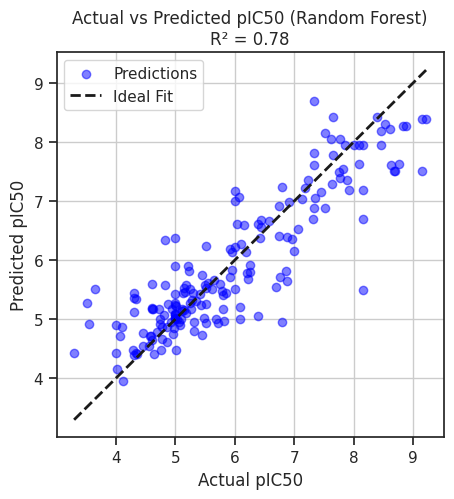

In [424]:
import matplotlib.pyplot as plt

Y_pred_rf = rf_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred_rf)

plt.figure(figsize=(5, 5))
plt.scatter(Y_test, Y_pred_rf, alpha=0.5, color='blue', label='Predictions')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual pIC50")
plt.ylabel("Predicted pIC50")

plt.title(f"Actual vs Predicted pIC50 (Random Forest)\nR² = {r2:.2f}")
plt.legend()
plt.grid(True)
plt.savefig('Actual vs Predicted pIC50 (Random Forest).pdf')
plt.show()

In [425]:
import shap
import matplotlib.pyplot as plt

explainer_rf = shap.Explainer(rf_model, X_train)

shap_values_rf = explainer_rf(X_test)

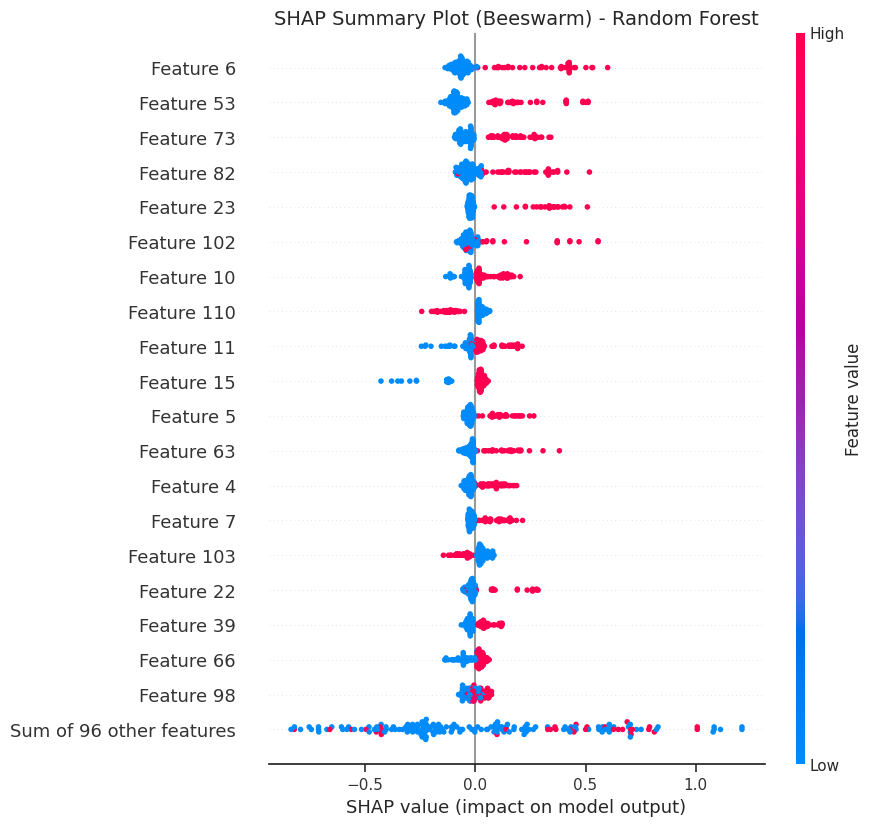

In [426]:
plt.title("SHAP Summary Plot (Beeswarm) - Random Forest", fontsize=14)
shap.plots.beeswarm(shap_values_rf, max_display=20)

<ipython-input-427-cb1624c16352>:9: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_rf, X_test, plot_type="bar")


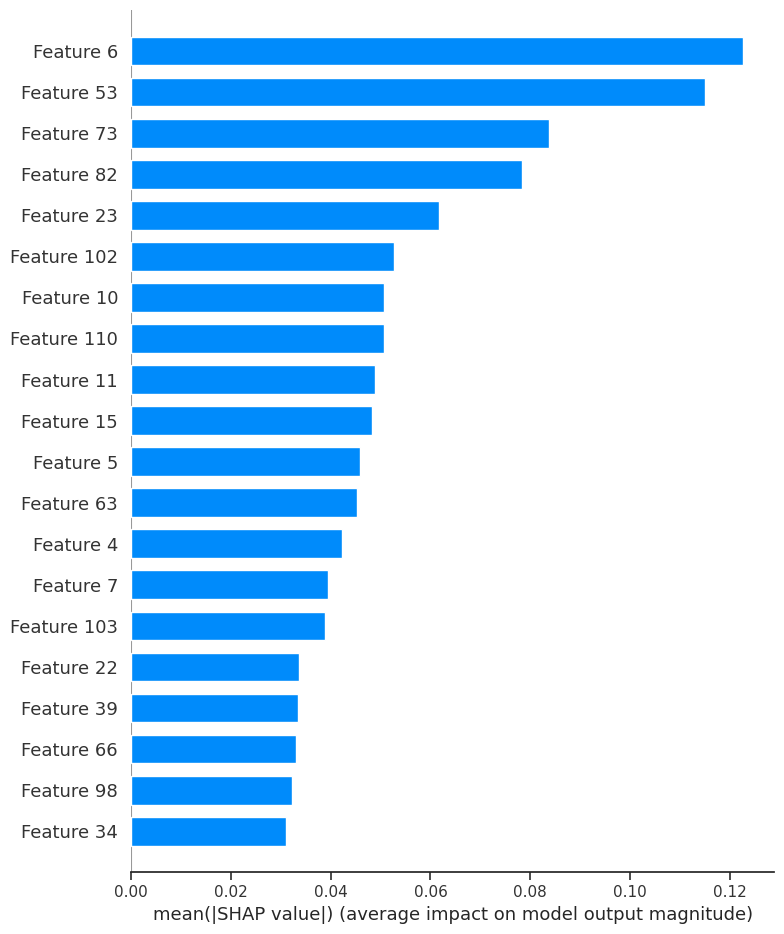

In [427]:
import shap
import matplotlib.pyplot as plt

explainer_rf = shap.Explainer(rf_model, X_train)

shap_values_rf = explainer_rf(X_test)

plt.title("SHAP Feature Importance (Bar Plot) - Random Forest", fontsize=6)
shap.summary_plot(shap_values_rf, X_test, plot_type="bar")

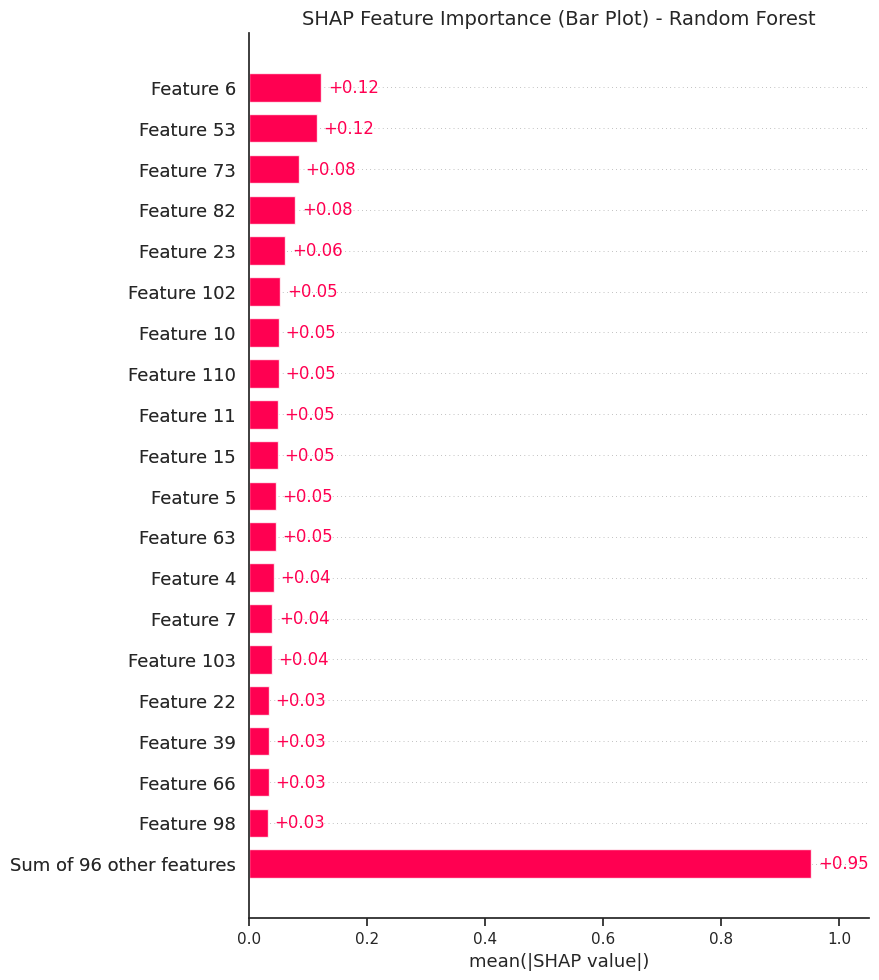

In [428]:
plt.title("SHAP Feature Importance (Bar Plot) - Random Forest", fontsize=14)
shap.plots.bar(shap_values_rf, max_display=20)

In [429]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_MW.csv (deflated 4%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_LogP.csv (deflated 4%)
  adding: bioactivity_data_raw.csv (deflated 92%)
  adding: bioactivity_data_preprocessed.csv (deflated 84%)
  adding: alzheimers_bioactivity_data_pIC50_Pubchem_fp_AB.csv (deflated 96%)
  adding: plot_LogP.pdf (deflated 40%)
  adding: descriptors_output.csv (deflated 96%)
  adding: plot_MW_vs_LogP.pdf (deflated 4%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: bioactivity_data_preprocessed_final.csv (deflated 77%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 8%)
  adding: mannwhitneyu_pIC50.csv (deflated 7%)
  adding: Actual vs Predicted pIC50 (Random Forest).pdf (deflated 26%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 7%)
  adding: alzheimers_bioactivity_data_pIC50_pubchem_fp_AB.csv (deflated 96%)
  adding: descriptor_list.csv (deflated 95%)
  adding: plot_MW.pdf (deflated 40%)
  adding: pl

In [430]:
import joblib
import pickle
filename = 'bioactivity_prediction_model.pkl'
pickle.dump(rf_model, open('bioactivity_prediction_model.pkl', 'wb'))
